In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [6]:
%config IPCompleter.greedy=True


In [7]:
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler(feature_range=(0,1))
training_set_scaled = SC.fit_transform(training_set)

In [9]:
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [11]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
regressor = Sequential()

In [14]:
regressor.add(LSTM(units=50,return_sequences=True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

C:\ProgramData\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
regressor.add(LSTM(units=50,return_sequences=True,))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units=50,return_sequences=True,))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units=50,return_sequences=True,))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(Dense(units=1))

In [19]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step - loss: 0.1703
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0862
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0841
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - loss: 0.0835
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0801
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0831
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0807
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0795
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0747
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0819
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0831
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0771
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0754
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0754
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s

In [32]:
test_acc = regressor.evaluate(x_train, y_train, verbose=2)
print(f'\nTest accuracy: {test_acc}')


38/38 - 1s - 37ms/step - loss: 0.0716

Test accuracy: 0.07156910002231598


In [21]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [28]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = SC.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = SC.inverse_transform(predicted_stock_price.reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


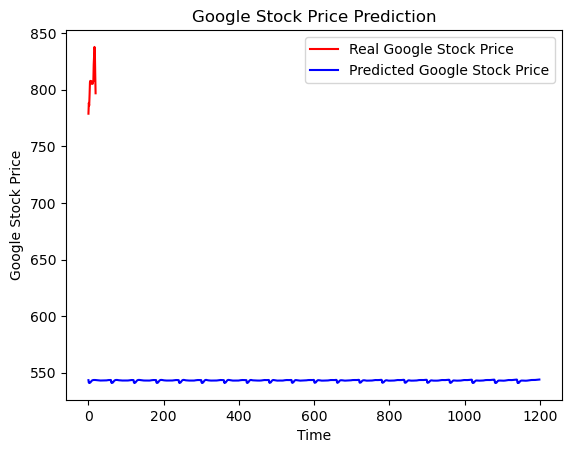

In [29]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()